In [5]:
from __future__ import print_function
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os



# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "train_deep_neural_nets"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

    
import graphviz
from graphviz import Source
from sklearn.tree import export_graphviz
# install pydot from conda 
# !conda install -c anaconda pydot
import pydot

import tensorflow as tf
from tensorflow import keras

print(tf.__version__, keras.__version__)

2.1.0 2.2.4-tf


**Vanishing/Exploding Gradients Problem**

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

Saving figure sigmoid_saturation_plot


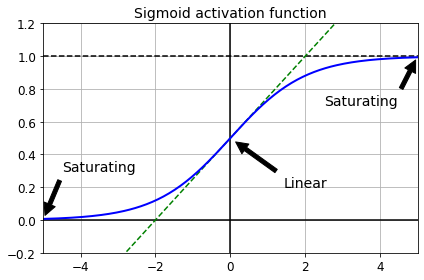

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()

**Xavier and He Initialization**

In [7]:
[ initializer for initializer in dir(keras.initializers) if not initializer.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'Identity',
 'Initializer',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'serialize',
 'zeros']

By default keras uses glorot initialization with uniform distribution.
It cab be changed to he initialization:

In [8]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

He initialization with uniform distr vased on fan_avg:

In [9]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

**Nonsaturating Activation Functions**

**Leaky RELU**

In [10]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

Saving figure leaky_relu_plot


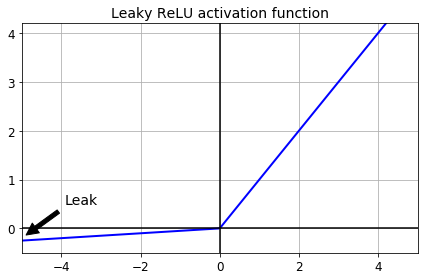

In [11]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()


In [12]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'tanh']

Relu variants

In [13]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [14]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Leaky Relu

In [17]:
#Leaky Relu model:
model_lrelu = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model_lrelu.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
lrelu_history = model_lrelu.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 105us/sample - loss: 1.2689 - accuracy: 0.6168 - val_loss: 0.8685 - val_accuracy: 0.7226
Epoch 2/10
55000/55000 [==============================] - 5s 99us/sample - loss: 0.7823 - accuracy: 0.7482 - val_loss: 0.7041 - val_accuracy: 0.7710
Epoch 3/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.6736 - accuracy: 0.7822 - val_loss: 0.6314 - val_accuracy: 0.7980
Epoch 4/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.6177 - accuracy: 0.7996 - val_loss: 0.5889 - val_accuracy: 0.8106
Epoch 5/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.5807 - accuracy: 0.8093 - val_loss: 0.5578 - val_accuracy: 0.8188
Epoch 6/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.5540 - accuracy: 0.8169 - val_loss: 0.5357 - val_accuracy: 0.8256
Epoch 7/10
55000/55000 [==============================] 

In [21]:
model_lrelu.evaluate(X_test, y_test, verbose=2)

10000/10000 - 1s - loss: 0.5183 - accuracy: 0.8206


[0.5183214697360993, 0.8206]

In [30]:
model_lrelu.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               235500    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 300)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               30100     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
________________________________________________

In [29]:
[(var.name, var.trainable) for var in model_lrelu.layers[1].variables]

[('dense_8/kernel:0', True), ('dense_8/bias:0', True)]

Parametric Leaky Relu - alpha is learned during training

In [19]:
# prelu model
model_prelu = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [20]:
model_prelu.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
prelu_history = model_prelu.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 87us/sample - loss: 1.4229 - accuracy: 0.5876 - val_loss: 0.9514 - val_accuracy: 0.6932
Epoch 2/10
55000/55000 [==============================] - 4s 77us/sample - loss: 0.8369 - accuracy: 0.7300 - val_loss: 0.7327 - val_accuracy: 0.7694
Epoch 3/10
55000/55000 [==============================] - 4s 75us/sample - loss: 0.6979 - accuracy: 0.7746 - val_loss: 0.6445 - val_accuracy: 0.7956
Epoch 4/10
55000/55000 [==============================] - 4s 71us/sample - loss: 0.6295 - accuracy: 0.7954 - val_loss: 0.5950 - val_accuracy: 0.8118
Epoch 5/10
55000/55000 [==============================] - 5s 84us/sample - loss: 0.5867 - accuracy: 0.8083 - val_loss: 0.5605 - val_accuracy: 0.8192
Epoch 6/10
55000/55000 [==============================] - 6s 106us/sample - loss: 0.5572 - accuracy: 0.8160 - val_loss: 0.5368 - val_accuracy: 0.8244
Epoch 7/10
55000/55000 [==============================] 

In [22]:
model_prelu.evaluate(X_test, y_test, verbose=2)

10000/10000 - 0s - loss: 0.5149 - accuracy: 0.8240


[0.5148681384086609, 0.824]

ELU - Exponential Linear Unit

In [31]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

Saving figure elu_plot


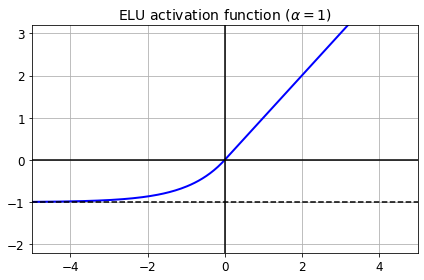

In [32]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()


Implementing ELU in TensorFlow is trivial, just specify the activation function when building each layer:

In [33]:
keras.layers.Dense(10, activation="elu")

This activation function was proposed in this great paper by Günter Klambauer, Thomas Unterthiner and Andreas Mayr, published in June 2017. During training, a neural network composed exclusively of a stack of dense layers using the SELU activation function and LeCun initialization will self-normalize: the output of each layer will tend to preserve the same mean and variance during training, which solves the vanishing/exploding gradients problem. As a result, this activation function outperforms the other activation functions very significantly for such neural nets, so you should really try it out. Unfortunately, the self-normalizing property of the SELU activation function is easily broken: you cannot use ℓ1 or ℓ2 regularization, regular dropout, max-norm, skip connections or other non-sequential topologies (so recurrent neural networks won't self-normalize). However, in practice it works quite well with sequential CNNs. If you break self-normalization, SELU will not necessarily outperform other activation functions.

In [34]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [35]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

Saving figure selu_plot


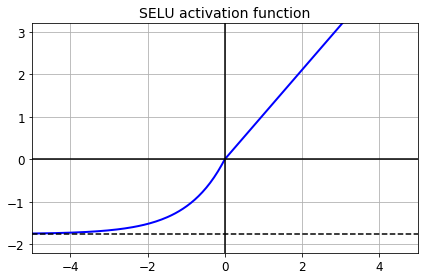

In [36]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()

By default, the SELU hyperparameters (scale and alpha) are tuned in such a way that the mean output of each neuron remains close to 0, and the standard deviation remains close to 1 (assuming the inputs are standardized with mean 0 and standard deviation 1 too). Using this activation function, even a 1,000 layer deep neural network preserves roughly mean 0 and standard deviation 1 across all layers, avoiding the exploding/vanishing gradients problem:

In [37]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))


Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [38]:
# Using SELU:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [42]:
selu_model = keras.models.Sequential()
selu_model.add(keras.layers.Flatten(input_shape=[28, 28]))
selu_model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    selu_model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
selu_model.add(keras.layers.Dense(10, activation="softmax"))

In [43]:
selu_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [44]:
# scale inputs with mean = 0, std=1
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [45]:
selu_history = selu_model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 26s 471us/sample - loss: 1.3391 - accuracy: 0.4796 - val_loss: 0.9248 - val_accuracy: 0.6426
Epoch 2/5
55000/55000 [==============================] - 31s 564us/sample - loss: 0.8198 - accuracy: 0.6746 - val_loss: 0.7148 - val_accuracy: 0.7134
Epoch 3/5
55000/55000 [==============================] - 23s 414us/sample - loss: 0.7007 - accuracy: 0.7351 - val_loss: 0.7057 - val_accuracy: 0.7298
Epoch 4/5
55000/55000 [==============================] - 23s 420us/sample - loss: 0.6198 - accuracy: 0.7727 - val_loss: 0.6032 - val_accuracy: 0.7776
Epoch 5/5
55000/55000 [==============================] - 23s 414us/sample - loss: 0.5763 - accuracy: 0.7907 - val_loss: 0.5312 - val_accuracy: 0.8056


In [48]:
# Using ReLu for same 100 layer model:
relu_model_100 = keras.models.Sequential()
relu_model_100.add(keras.layers.Flatten(input_shape=[28, 28]))
relu_model_100.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    relu_model_100.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
relu_model_100.add(keras.layers.Dense(10, activation="softmax"))

In [49]:
relu_model_100.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [50]:
relu_100_history = relu_model_100.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 25s 457us/sample - loss: 2.0511 - accuracy: 0.2322 - val_loss: 1.8237 - val_accuracy: 0.3218
Epoch 2/5
55000/55000 [==============================] - 23s 413us/sample - loss: 1.7187 - accuracy: 0.3333 - val_loss: 1.6078 - val_accuracy: 0.3496
Epoch 3/5
55000/55000 [==============================] - 23s 417us/sample - loss: 1.2902 - accuracy: 0.4613 - val_loss: 1.6198 - val_accuracy: 0.4464
Epoch 4/5
55000/55000 [==============================] - 23s 412us/sample - loss: 0.9759 - accuracy: 0.6201 - val_loss: 1.0148 - val_accuracy: 0.6450
Epoch 5/5
55000/55000 [==============================] - 22s 406us/sample - loss: 0.9369 - accuracy: 0.6366 - val_loss: 0.8888 - val_accuracy: 0.6512


:/ vanishing gradient for standard ReLu activation function

**Batch Normalization**

In [51]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [52]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_420 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_421 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_422 (Dense)            (None, 10)               

In [53]:
# Parameters for bn layer, 2 are trainable, 2 are not:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]


[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [54]:
# These 2 operations will update moving averages
bn1.updates

[<tf.Operation 'cond/Identity' type=Identity>,
 <tf.Operation 'cond_1/Identity' type=Identity>]

In [55]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [56]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 9s 162us/sample - loss: 0.8532 - accuracy: 0.7167 - val_loss: 0.5590 - val_accuracy: 0.8078
Epoch 2/10
55000/55000 [==============================] - 8s 140us/sample - loss: 0.5777 - accuracy: 0.8013 - val_loss: 0.4806 - val_accuracy: 0.8362
Epoch 3/10
55000/55000 [==============================] - 8s 140us/sample - loss: 0.5155 - accuracy: 0.8210 - val_loss: 0.4443 - val_accuracy: 0.8466
Epoch 4/10
55000/55000 [==============================] - 8s 148us/sample - loss: 0.4827 - accuracy: 0.8302 - val_loss: 0.4230 - val_accuracy: 0.8550
Epoch 5/10
55000/55000 [==============================] - 8s 148us/sample - loss: 0.4564 - accuracy: 0.8405 - val_loss: 0.4054 - val_accuracy: 0.8598
Epoch 6/10
55000/55000 [==============================] - 7s 121us/sample - loss: 0.4431 - accuracy: 0.8442 - val_loss: 0.3918 - val_accuracy: 0.8636
Epoch 7/10
55000/55000 [===========================

Sometimes applying BN before the activation function works better (there's a debate on this topic). Moreover, the layer before a BatchNormalization layer does not need to have bias terms, since the BatchNormalization layer some as well, it would be a waste of parameters, so you can set use_bias=False when creating those layers:

In [57]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [58]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [59]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 116us/sample - loss: 1.0956 - accuracy: 0.6543 - val_loss: 0.6888 - val_accuracy: 0.7820
Epoch 2/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.6892 - accuracy: 0.7781 - val_loss: 0.5594 - val_accuracy: 0.8210
Epoch 3/10
55000/55000 [==============================] - 5s 100us/sample - loss: 0.5993 - accuracy: 0.8037 - val_loss: 0.5028 - val_accuracy: 0.8362
Epoch 4/10
55000/55000 [==============================] - 6s 100us/sample - loss: 0.5513 - accuracy: 0.8155 - val_loss: 0.4671 - val_accuracy: 0.8468
Epoch 5/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.5184 - accuracy: 0.8243 - val_loss: 0.4451 - val_accuracy: 0.8532
Epoch 6/10
55000/55000 [==============================] - 6s 101us/sample - loss: 0.4962 - accuracy: 0.8305 - val_loss: 0.4282 - val_accuracy: 0.8554
Epoch 7/10
55000/55000 [============================

**Gradient Clipping**

In [61]:
optimizer = keras.optimizers.SGD(clipvalue=1.0) # can change orientation of the gradient
optimizer_2 = keras.optimizers.SGD(clipnorm=1.0) # preserves orientation of the gradient

**Reusing Pretrained Layers**

Let's split the fashion MNIST training set in two:
* `X_train_A`: all images of all items except for sandals and shirts (classes 5 and 6).
* `X_train_B`: a much smaller training set of just the first 200 images of sandals or shirts.

The validation set and the test set are also split this way, but without restricting the number of images.

We will train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B (binary classification). We hope to transfer a little bit of knowledge from task A to task B, since classes in set A (sneakers, ankle boots, coats, t-shirts, etc.) are somewhat similar to classes in set B (sandals and shirts). However, since we are using `Dense` layers, only patterns that occur at the same location can be reused (in contrast, convolutional layers will transfer much better, since learned patterns can be detected anywhere on the image, as we will see in the CNN chapter).

Transfer Learning with Keras

In [62]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [64]:
X_train_A.shape, X_train_B.shape

((43986, 28, 28), (200, 28, 28))

In [65]:
y_train_A[:30], y_train_B[:30]

(array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
        1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8),
 array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32))

In [66]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [67]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [68]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Train on 43986 samples, validate on 4014 samples
Epoch 1/20
43986/43986 [==============================] - 4s 90us/sample - loss: 0.5977 - accuracy: 0.8093 - val_loss: 0.4005 - val_accuracy: 0.8615
Epoch 2/20
43986/43986 [==============================] - 5s 103us/sample - loss: 0.3585 - accuracy: 0.8791 - val_loss: 0.3374 - val_accuracy: 0.8847
Epoch 3/20
43986/43986 [==============================] - 5s 107us/sample - loss: 0.3212 - accuracy: 0.8910 - val_loss: 0.3096 - val_accuracy: 0.8961
Epoch 4/20
43986/43986 [==============================] - 5s 113us/sample - loss: 0.3008 - accuracy: 0.8968 - val_loss: 0.2972 - val_accuracy: 0.9003
Epoch 5/20
43986/43986 [==============================] - 5s 107us/sample - loss: 0.2870 - accuracy: 0.9017 - val_loss: 0.2868 - val_accuracy: 0.9028
Epoch 6/20
43986/43986 [==============================] - 5s 104us/sample - loss: 0.2769 - accuracy: 0.9061 - val_loss: 0.2764 - val_accuracy: 0.9086
Epoch 7/20
43986/43986 [============================

In [69]:
model_A.save("my_model_A.h5")

In [70]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [71]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [72]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/20
200/200 [==============================] - 1s 3ms/sample - loss: 0.7436 - accuracy: 0.5250 - val_loss: 0.5966 - val_accuracy: 0.6826
Epoch 2/20
200/200 [==============================] - 0s 506us/sample - loss: 0.5300 - accuracy: 0.7450 - val_loss: 0.4596 - val_accuracy: 0.8377
Epoch 3/20
200/200 [==============================] - 0s 499us/sample - loss: 0.4094 - accuracy: 0.8550 - val_loss: 0.3748 - val_accuracy: 0.8925
Epoch 4/20
200/200 [==============================] - 0s 490us/sample - loss: 0.3322 - accuracy: 0.9250 - val_loss: 0.3199 - val_accuracy: 0.9199
Epoch 5/20
200/200 [==============================] - 0s 494us/sample - loss: 0.2798 - accuracy: 0.9550 - val_loss: 0.2809 - val_accuracy: 0.9412
Epoch 6/20
200/200 [==============================] - 0s 479us/sample - loss: 0.2421 - accuracy: 0.9750 - val_loss: 0.2501 - val_accuracy: 0.9523
Epoch 7/20
200/200 [==============================] - 0s 491us/sample - loss: 0.

In [73]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_423 (Dense)            (None, 300)               235200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_424 (Dense)            (None, 100)               30000     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)              

In [74]:
# Load model A, get rid of to layer, add 1 layer on top of it
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [76]:
# we need to clone model_A, its layers are now shared with model_B_on_A
model_A_clone = keras.models.clone_model(model_A)
# copy the weights, since clone() doesn't copy them
model_A_clone.set_weights(model_A.get_weights())

In [77]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [78]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/4
200/200 [==============================] - 0s 2ms/sample - loss: 1.0941 - accuracy: 0.4600 - val_loss: 1.0529 - val_accuracy: 0.4300
Epoch 2/4
200/200 [==============================] - 0s 439us/sample - loss: 1.0031 - accuracy: 0.4800 - val_loss: 0.9705 - val_accuracy: 0.4635
Epoch 3/4
200/200 [==============================] - 0s 444us/sample - loss: 0.9206 - accuracy: 0.4950 - val_loss: 0.8931 - val_accuracy: 0.4888
Epoch 4/4
200/200 [==============================] - 0s 474us/sample - loss: 0.8431 - accuracy: 0.5350 - val_loss: 0.8200 - val_accuracy: 0.5172
Train on 200 samples, validate on 986 samples
Epoch 1/16
200/200 [==============================] - 1s 3ms/sample - loss: 0.6227 - accuracy: 0.6250 - val_loss: 0.4706 - val_accuracy: 0.7383
Epoch 2/16
200/200 [==============================] - 0s 578us/sample - loss: 0.3683 - accuracy: 0.8500 - val_loss: 0.3334 - val_accuracy: 0.8702
Epoch 3/16
200/200 [====================

In [84]:
model_B_eval = model_B.evaluate(X_test_B, y_test_B)

model_B_on_A_eval = model_B_on_A.evaluate(X_test_B, y_test_B)

print(f'model_B_eval: {model_B_eval}, model_B_on_A_eval:{model_B_on_A_eval}')
print(f'improvement: {(1-model_B_eval[1]) / (1-model_B_on_A_eval[1])} times')


2000/2000 [==============================] - 0s 53us/sample - loss: 0.0708 - accuracy: 0.9920
model_B_eval: [0.10978321135044097, 0.979], model_B_on_A_eval:[0.07078160172700881, 0.992]
improvement: 2.6249981373586255 times


**Faster Optimizers**

In [85]:
#Momentum optimization
momentum_optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

#Nesterov Accelerated Gradient
nesterov_optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

#AdaGrad
adagrad_optimizer = keras.optimizers.Adagrad(lr=0.001)

#RMSProp
rmsprop_optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

#Adam Optimization
adam_optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

#Adamax Optimization
adamax_optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

#Nadam Optimization
nadam_optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)


**Learning Rate Scheduling**

*Power Scheduling*

Power Scheduling

lr = lr0 / (1 + steps / s)**c

 Keras uses c=1 and s = 1 / decay

In [86]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [87]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))



Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 4s 72us/sample - loss: 0.4863 - accuracy: 0.8299 - val_loss: 0.4118 - val_accuracy: 0.8552
Epoch 2/25
55000/55000 [==============================] - 4s 68us/sample - loss: 0.3822 - accuracy: 0.8646 - val_loss: 0.3763 - val_accuracy: 0.8670
Epoch 3/25
55000/55000 [==============================] - 4s 68us/sample - loss: 0.3489 - accuracy: 0.8765 - val_loss: 0.3644 - val_accuracy: 0.8734
Epoch 4/25
55000/55000 [==============================] - 4s 68us/sample - loss: 0.3273 - accuracy: 0.8842 - val_loss: 0.3485 - val_accuracy: 0.8806
Epoch 5/25
55000/55000 [==============================] - 4s 71us/sample - loss: 0.3105 - accuracy: 0.8890 - val_loss: 0.3464 - val_accuracy: 0.8812
Epoch 6/25
55000/55000 [==============================] - 4s 74us/sample - loss: 0.2973 - accuracy: 0.8939 - val_loss: 0.3390 - val_accuracy: 0.8834
Epoch 7/25
55000/55000 [==============================] -

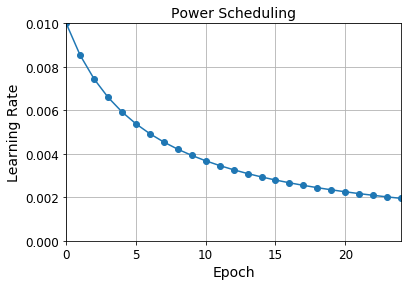

In [88]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

**Exponential Scheduling**

lr = lr0 * 0.1**(epoch / s)


In [89]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [90]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [91]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 6s 105us/sample - loss: 0.8307 - accuracy: 0.7631 - val_loss: 0.7617 - val_accuracy: 0.7938
Epoch 2/25
55000/55000 [==============================] - 5s 86us/sample - loss: 0.6875 - accuracy: 0.7984 - val_loss: 0.8966 - val_accuracy: 0.7522
Epoch 3/25
55000/55000 [==============================] - 5s 96us/sample - loss: 0.6397 - accuracy: 0.8169 - val_loss: 0.5160 - val_accuracy: 0.8542
Epoch 4/25
55000/55000 [==============================] - 5s 91us/sample - loss: 0.5277 - accuracy: 0.8407 - val_loss: 0.5446 - val_accuracy: 0.8452
Epoch 5/25
55000/55000 [==============================] - 5s 87us/sample - loss: 0.4968 - accuracy: 0.8515 - val_loss: 0.5168 - val_accuracy: 0.8526
Epoch 6/25
55000/55000 [==============================] - 5s 84us/sample - loss: 0.4602 - accuracy: 0.8616 - val_loss: 0.4739 - val_accuracy: 0.8594
Epoch 7/25
55000/55000 [==============================] 

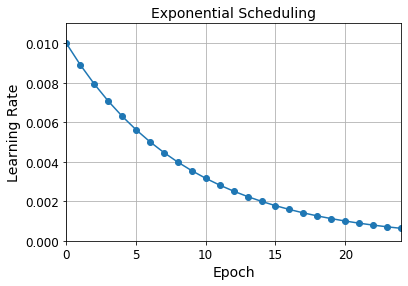

In [92]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

The schedule function can take the current learning rate as a second argument:

In [93]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

If you want to update the learning rate at each iteration rather than at each epoch, you must write your own callback class:

In [94]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])



Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 7s 121us/sample - loss: 0.8027 - accuracy: 0.7652 - val_loss: 0.7002 - val_accuracy: 0.7718
Epoch 2/25
55000/55000 [==============================] - 6s 109us/sample - loss: 0.7078 - accuracy: 0.7894 - val_loss: 0.6757 - val_accuracy: 0.7776
Epoch 3/25
55000/55000 [==============================] - 6s 110us/sample - loss: 0.5755 - accuracy: 0.8219 - val_loss: 0.5889 - val_accuracy: 0.8230
Epoch 4/25
55000/55000 [==============================] - 6s 111us/sample - loss: 0.5218 - accuracy: 0.8377 - val_loss: 0.5057 - val_accuracy: 0.8504
Epoch 5/25
55000/55000 [==============================] - 6s 113us/sample - loss: 0.4840 - accuracy: 0.8462 - val_loss: 0.4457 - val_accuracy: 0.8562
Epoch 6/25
55000/55000 [==============================] - 6s 112us/sample - loss: 0.4423 - accuracy: 0.8580 - val_loss: 0.4896 - val_accuracy: 0.8396
Epoch 7/25
55000/55000 [===========================

In [95]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

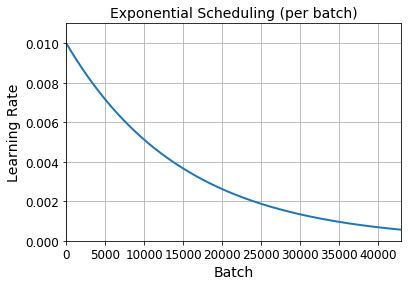

In [96]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

**Piecewise Constant Scheduling**

In [97]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [98]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [99]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 6s 103us/sample - loss: 0.9097 - accuracy: 0.7483 - val_loss: 0.9084 - val_accuracy: 0.7274
Epoch 2/25
55000/55000 [==============================] - 5s 89us/sample - loss: 0.7927 - accuracy: 0.7676 - val_loss: 2.2337 - val_accuracy: 0.5556
Epoch 3/25
55000/55000 [==============================] - 5s 90us/sample - loss: 0.8222 - accuracy: 0.7663 - val_loss: 0.7899 - val_accuracy: 0.7998
Epoch 4/25
55000/55000 [==============================] - 5s 86us/sample - loss: 0.8033 - accuracy: 0.7713 - val_loss: 0.8475 - val_accuracy: 0.7252
Epoch 5/25
55000/55000 [==============================] - 5s 88us/sample - loss: 0.8922 - accuracy: 0.7409 - val_loss: 1.1771 - val_accuracy: 0.6422
Epoch 6/25
55000/55000 [==============================] - 5s 90us/sample - loss: 0.5598 - accuracy: 0.8252 - val_loss: 0.5974 - val_accuracy: 0.8346
Epoch 7/25
55000/55000 [==============================] 

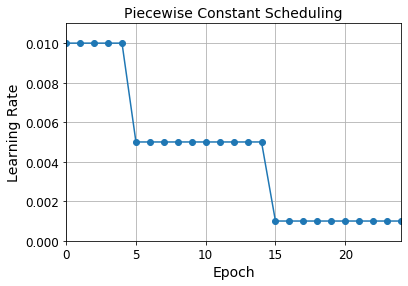

In [100]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

**Performance Scheduling**

In [101]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 6s 109us/sample - loss: 0.5876 - accuracy: 0.8079 - val_loss: 0.5109 - val_accuracy: 0.8440
Epoch 2/25
55000/55000 [==============================] - 6s 104us/sample - loss: 0.5123 - accuracy: 0.8362 - val_loss: 0.4946 - val_accuracy: 0.8402
Epoch 3/25
55000/55000 [==============================] - 6s 103us/sample - loss: 0.4975 - accuracy: 0.8444 - val_loss: 0.5038 - val_accuracy: 0.8412
Epoch 4/25
55000/55000 [==============================] - 6s 104us/sample - loss: 0.5093 - accuracy: 0.8505 - val_loss: 0.5520 - val_accuracy: 0.8288
Epoch 5/25
55000/55000 [==============================] - 6s 105us/sample - loss: 0.5018 - accuracy: 0.8517 - val_loss: 0.5746 - val_accuracy: 0.8300
Epoch 6/25
55000/55000 [==============================] - 6s 103us/sample - loss: 0.4906 - accuracy: 0.8571 - val_loss: 0.7635 - val_accuracy: 0.8424
Epoch 7/25
55000/55000 [===========================

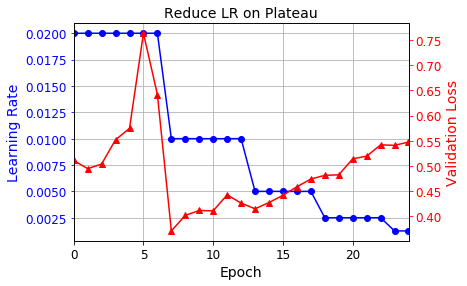

In [102]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

**tf.keras schedulers**

In [103]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 4s 75us/sample - loss: 0.4865 - accuracy: 0.8290 - val_loss: 0.4103 - val_accuracy: 0.8586
Epoch 2/25
55000/55000 [==============================] - 4s 69us/sample - loss: 0.3790 - accuracy: 0.8647 - val_loss: 0.3773 - val_accuracy: 0.8688
Epoch 3/25
55000/55000 [==============================] - 4s 68us/sample - loss: 0.3462 - accuracy: 0.8771 - val_loss: 0.3660 - val_accuracy: 0.8716
Epoch 4/25
55000/55000 [==============================] - 4s 69us/sample - loss: 0.3246 - accuracy: 0.8849 - val_loss: 0.3515 - val_accuracy: 0.8754
Epoch 5/25
55000/55000 [==============================] - 4s 67us/sample - loss: 0.3083 - accuracy: 0.8903 - val_loss: 0.3543 - val_accuracy: 0.8744
Epoch 6/25
55000/55000 [==============================] - 4s 71us/sample - loss: 0.2950 - accuracy: 0.8950 - val_loss: 0.3537 - val_accuracy: 0.8758
Epoch 7/25
55000/55000 [==============================] -

In [104]:
# Piecewise constant scheduling, can be done this way:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

**1Cycle scheduling**

In [105]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [106]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

Train on 55000 samples
55000/55000 [==============================] - 3s 47us/sample - loss: 13639460992750976.0000 - accuracy: 0.3685


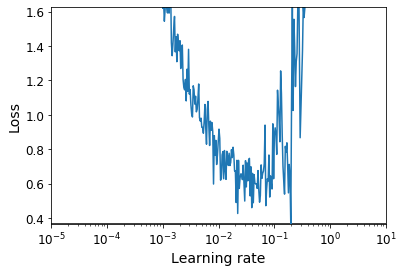

In [107]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [108]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [109]:
n_epochs = 25
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 2s 44us/sample - loss: 0.6495 - accuracy: 0.7766 - val_loss: 0.4830 - val_accuracy: 0.8356
Epoch 2/25
55000/55000 [==============================] - 2s 43us/sample - loss: 0.4525 - accuracy: 0.8424 - val_loss: 0.4339 - val_accuracy: 0.8498
Epoch 3/25
55000/55000 [==============================] - 2s 41us/sample - loss: 0.4101 - accuracy: 0.8566 - val_loss: 0.4030 - val_accuracy: 0.8614
Epoch 4/25
55000/55000 [==============================] - 1s 24us/sample - loss: 0.3827 - accuracy: 0.8649 - val_loss: 0.3894 - val_accuracy: 0.8696
Epoch 5/25
55000/55000 [==============================] - 1s 21us/sample - loss: 0.3618 - accuracy: 0.8707 - val_loss: 0.3854 - val_accuracy: 0.8636
Epoch 6/25
55000/55000 [==============================] - 1s 24us/sample - loss: 0.3442 - accuracy: 0.8772 - val_loss: 0.3671 - val_accuracy: 0.8732
Epoch 7/25
55000/55000 [==============================] -

Avoiding Overfitting Through Regularization

$\ell_1$ and $\ell_2$ regularization

$\ell_1$ - Lasso regression -> for sparse models
Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.

$\ell_2$ - Ridge Regression 
Adds “squared magnitude” of coefficient as penalty term to the loss function


In [110]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [111]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 35s 630us/sample - loss: 1.6084 - accuracy: 0.8122 - val_loss: 0.7196 - val_accuracy: 0.8330
Epoch 2/2
55000/55000 [==============================] - 33s 608us/sample - loss: 0.7226 - accuracy: 0.8263 - val_loss: 0.6988 - val_accuracy: 0.8346


In [112]:
# Use python functools.partial() to create thin wrapper around any callable Dense
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 34s 627us/sample - loss: 1.6791 - accuracy: 0.8116 - val_loss: 0.7414 - val_accuracy: 0.8216
Epoch 2/2
55000/55000 [==============================] - 14s 247us/sample - loss: 0.7186 - accuracy: 0.8268 - val_loss: 0.7202 - val_accuracy: 0.8182


**Dropout**

At every training step, every neuron ( including input ) has probabilty to being "dropped out" - it would be ignored during current step.

During testing every input connection is multiplied by 1/p to compensate for droput rate.

In [113]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 6s 111us/sample - loss: 0.5734 - accuracy: 0.8024 - val_loss: 0.3863 - val_accuracy: 0.8596
Epoch 2/2
55000/55000 [==============================] - 5s 95us/sample - loss: 0.4248 - accuracy: 0.8434 - val_loss: 0.3435 - val_accuracy: 0.8736


**Alpha Droput**

Dropout that keeps mean and variance of inputs to their original values, in order to ensure the self-normalizing property even after this dropout. Alpha Dropout fits well to Scaled Exponential Linear Units by randomly setting activations to the negative saturation value.

In [114]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 5s 91us/sample - loss: 0.6633 - accuracy: 0.7585 - val_loss: 0.6329 - val_accuracy: 0.8282
Epoch 2/20
55000/55000 [==============================] - 4s 80us/sample - loss: 0.5612 - accuracy: 0.7946 - val_loss: 0.5640 - val_accuracy: 0.8450
Epoch 3/20
55000/55000 [==============================] - 4s 77us/sample - loss: 0.5239 - accuracy: 0.8058 - val_loss: 0.4829 - val_accuracy: 0.8540
Epoch 4/20
55000/55000 [==============================] - 4s 78us/sample - loss: 0.5035 - accuracy: 0.8151 - val_loss: 0.4912 - val_accuracy: 0.8544
Epoch 5/20
55000/55000 [==============================] - 4s 78us/sample - loss: 0.4927 - accuracy: 0.8187 - val_loss: 0.4627 - val_accuracy: 0.8586
Epoch 6/20
55000/55000 [==============================] - 4s 77us/sample - loss: 0.4850 - accuracy: 0.8213 - val_loss: 0.4714 - val_accuracy: 0.8622
Epoch 7/20
55000/55000 [==============================] -

In [116]:
model.evaluate(X_test_scaled, y_test)
model.evaluate(X_train_scaled, y_train)

55000/55000 [==============================] - 3s 51us/sample - loss: 0.3738 - accuracy: 0.8819


[0.37381767154065043, 0.88192725]

In [117]:
history = model.fit(X_train_scaled, y_train)

Train on 55000 samples
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4185 - accuracy: 0.8435


In [118]:
model.evaluate(X_test_scaled, y_test)
model.evaluate(X_train_scaled, y_train)

55000/55000 [==============================] - ETA: 0s - loss: 0.3223 - accuracy: 0.89 - 3s 50us/sample - loss: 0.3222 - accuracy: 0.8936


[0.322177374481613, 0.8936]

**MC Dropout**

Monte Carlo dropout.
When making prediction we don't turn off dropout layers. We make many predictions with different neurons being droput and average predictions.

In [121]:
# we make 100 predictions over test set & stack them. All the predictions will be different. 
y_probas = np.stack([model(X_test_scaled, training=True) # [100, 10000, 10]
                     for sample in range(100)]) 
y_proba = y_probas.mean(axis=0) # [10000, 10]
y_std = y_probas.std(axis=0)

In [122]:
np.round(model.predict(X_test_scaled[:1]), 2) # dropout off

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [123]:
np.round(y_probas[:, :1], 2) # dropout on

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.93]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.19, 0.  , 0.75]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.49, 0.  , 0.51]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.02, 0.  , 0.95]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.77, 0.  , 0.18]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.65, 0.  , 0.34]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.1 , 0.  , 0.89]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.91]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.04, 0.  , 0.93]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.14, 0.  , 0.85]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.89]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.78, 0.  , 0.22]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1

In [125]:
np.round(y_proba[:2], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.22, 0.  , 0.74],
       [0.  , 0.  , 0.97, 0.  , 0.01, 0.  , 0.02, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [126]:
y_std = y_probas.std(axis=0)
np.round(y_std[:2], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.01, 0.23, 0.  , 0.25],
       [0.  , 0.  , 0.05, 0.  , 0.02, 0.  , 0.04, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [127]:
y_pred = np.argmax(y_proba, axis=1)

In [128]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8718

In [129]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [130]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])


In [131]:
mc_model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_470 (Dense)            (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_471 (Dense)            (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_472 (Dense)            (None, 10)              

In [132]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [133]:
mc_model.set_weights(model.get_weights())

In [134]:
# To use model with MCDropout:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.18, 0.  , 0.79]],
      dtype=float32)

**Max norm**

In [135]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [136]:
# or - using functools.partial():
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 6s 107us/sample - loss: 0.4713 - accuracy: 0.8353 - val_loss: 0.3694 - val_accuracy: 0.8624
Epoch 2/2
55000/55000 [==============================] - 6s 100us/sample - loss: 0.3509 - accuracy: 0.8724 - val_loss: 0.3368 - val_accuracy: 0.8766


In [143]:
from sklearn.model_selection import train_test_split
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()


X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, train_size=0.9)

In [144]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((45000, 32, 32, 3), (5000, 32, 32, 3), (45000, 1), (5000, 1))

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # vertical range to [0-1]
    plt.show()

In [175]:
def create_cifar_100_model():
    cifar_model = keras.models.Sequential()

    cifar_model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

    for _ in range(20):
        cifar_model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))

    cifar_model.add(keras.layers.Dense(10, activation="softmax"))
    return cifar_model

In [172]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="elu",
                                 kernel_initializer="he_normal"))
    

model.add(keras.layers.Dense(10, activation="softmax"))



In [ ]:
optimizer = keras.optimizers.Nadam(lr=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
cifar_model.summary()

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
nadam_optimizer = keras.optimizers.Nadam(lr=0.001)

cifar_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = cifar_model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

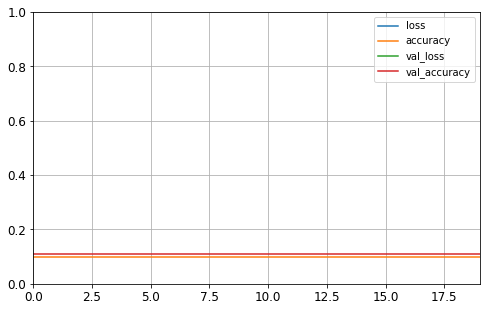

In [155]:
plot_learning_curves(history)

In [199]:
def prepare_run_dir(index, postfix=""):
    run_logdir = os.path.join(os.curdir, "my_logs", "cifar_logs", "run_{:s}_{:03d}".format(postfix, index))
    #run_logdir = os.path.join(os.curdir, "my_cifar_logs", "run_{:03d}".format(index))
    return run_logdir

In [201]:
def prepare_callbacks(logdir, modelname="my_cifar10_model.h5"):
    #cifar_logdir = os.path.join(os.curdir, "my_logs", "cifar_logs")
    tensorboard_cb = keras.callbacks.TensorBoard(log_dir=logdir, write_graph=True, write_images=True)
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
    model_checkpoint_cb = keras.callbacks.ModelCheckpoint(modelname, save_best_only=True)
    callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]
    return callbacks

In [186]:
#index = 1

learning_rates = [3e-6, 1e-5, 3e-5, 5e-5, 1e-4, 3e-4, 1e-3, 3e-3, 1e-2]
for index, lr in enumerate(learning_rates):
    logdir = prepare_run_dir(index)
    callbacks = prepare_callbacks(logdir)
    nadam_optimizer = keras.optimizers.Nadam(lr=lr)
    
    cifar_model = create_cifar_100_model()
    cifar_model.compile(loss="sparse_categorical_crossentropy", optimizer=nadam_optimizer, metrics=["accuracy"])
    
    history = cifar_model.fit(X_train, y_train, epochs=20, 
                              callbacks=callbacks,
                              validation_data=(X_valid, y_valid))
    cifar_model.evaluate(X_valid, y_valid)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 16s 354us/sample - loss: 39.2017 - accuracy: 0.1042 - val_loss: 6.3696 - val_accuracy: 0.1064
Epoch 2/20
45000/45000 [==============================] - 13s 300us/sample - loss: 4.5635 - accuracy: 0.1220 - val_loss: 3.4300 - val_accuracy: 0.1278
Epoch 3/20
45000/45000 [==============================] - 14s 314us/sample - loss: 3.0693 - accuracy: 0.1426 - val_loss: 2.7620 - val_accuracy: 0.1454
Epoch 4/20
45000/45000 [==============================] - 14s 306us/sample - loss: 2.6247 - accuracy: 0.1647 - val_loss: 2.4649 - val_accuracy: 0.1694
Epoch 5/20
45000/45000 [==============================] - 14s 316us/sample - loss: 2.3914 - accuracy: 0.1924 - val_loss: 2.2976 - val_accuracy: 0.2000
Epoch 6/20
45000/45000 [==============================] - 13s 298us/sample - loss: 2.2456 - accuracy: 0.2159 - val_loss: 2.1801 - val_accuracy: 0.2268
Epoch 7/20
45000/45000 [====================

Epoch 13/20
45000/45000 [==============================] - 13s 293us/sample - loss: 1.5739 - accuracy: 0.4328 - val_loss: 1.6306 - val_accuracy: 0.4074
Epoch 14/20
45000/45000 [==============================] - 13s 288us/sample - loss: 1.5585 - accuracy: 0.4397 - val_loss: 1.6303 - val_accuracy: 0.4108
Epoch 15/20
45000/45000 [==============================] - 13s 293us/sample - loss: 1.5422 - accuracy: 0.4451 - val_loss: 1.6266 - val_accuracy: 0.4078
Epoch 16/20
45000/45000 [==============================] - 13s 285us/sample - loss: 1.5262 - accuracy: 0.4494 - val_loss: 1.5805 - val_accuracy: 0.4338
Epoch 17/20
45000/45000 [==============================] - 13s 291us/sample - loss: 1.5115 - accuracy: 0.4558 - val_loss: 1.6380 - val_accuracy: 0.4102
Epoch 18/20
45000/45000 [==============================] - 13s 290us/sample - loss: 1.4982 - accuracy: 0.4611 - val_loss: 1.5584 - val_accuracy: 0.4380
Epoch 19/20
45000/45000 [==============================] - 13s 290us/sample - loss: 1.48

45000/45000 [==============================] - 12s 273us/sample - loss: 1.7921 - accuracy: 0.3445 - val_loss: 1.8013 - val_accuracy: 0.3438
Epoch 5/20
45000/45000 [==============================] - 12s 274us/sample - loss: 1.7452 - accuracy: 0.3654 - val_loss: 2.0083 - val_accuracy: 0.2992
Epoch 6/20
45000/45000 [==============================] - 13s 294us/sample - loss: 1.7064 - accuracy: 0.3826 - val_loss: 1.7045 - val_accuracy: 0.3848
Epoch 7/20
45000/45000 [==============================] - 12s 268us/sample - loss: 1.6679 - accuracy: 0.3976 - val_loss: 1.7239 - val_accuracy: 0.3782
Epoch 8/20
45000/45000 [==============================] - 13s 282us/sample - loss: 1.6434 - accuracy: 0.4060 - val_loss: 1.6624 - val_accuracy: 0.3990
Epoch 9/20
45000/45000 [==============================] - 13s 285us/sample - loss: 1.6229 - accuracy: 0.4160 - val_loss: 1.7062 - val_accuracy: 0.3828
Epoch 10/20
45000/45000 [==============================] - 13s 293us/sample - loss: 1.6021 - accuracy: 0.

45000/45000 [==============================] - 12s 273us/sample - loss: 1.9406 - accuracy: 0.2736 - val_loss: 2.0427 - val_accuracy: 0.2142
Epoch 5/20
45000/45000 [==============================] - 12s 264us/sample - loss: 794567.7232 - accuracy: 0.1270 - val_loss: 3.5467 - val_accuracy: 0.1020
Epoch 6/20
45000/45000 [==============================] - 12s 275us/sample - loss: 2.3964 - accuracy: 0.1002 - val_loss: 2.6870 - val_accuracy: 0.1020
Epoch 7/20
45000/45000 [==============================] - 13s 288us/sample - loss: 2.3807 - accuracy: 0.0995 - val_loss: 2.4609 - val_accuracy: 0.1096
Epoch 8/20
45000/45000 [==============================] - 12s 272us/sample - loss: 2.3825 - accuracy: 0.0999 - val_loss: 2.4302 - val_accuracy: 0.0952
Epoch 9/20
45000/45000 [==============================] - 12s 268us/sample - loss: 2.3815 - accuracy: 0.1016 - val_loss: 2.4455 - val_accuracy: 0.1096
Epoch 10/20
45000/45000 [==============================] - 12s 276us/sample - loss: 2.3858 - accurac

In [158]:
learning_rates = [1e-3, 3e-4, 1e-4, 3e-5, 1e-5, 3e-6]
for index, lr in enumerate(learning_rates):
    print(index, lr)

0 0.001
1 0.0003
2 0.0001
3 3e-05
4 1e-05
5 3e-06


In [190]:
lr=5e-5
logdir = os.path.join(os.curdir, "my_logs", "cifar_logs", "lr_{:03f}".format(lr))
callbacks = prepare_callbacks(logdir)
nadam_optimizer = keras.optimizers.Nadam(lr=lr)
   
cifar_model = create_cifar_100_model()
cifar_model.compile(loss="sparse_categorical_crossentropy", optimizer=nadam_optimizer, metrics=["accuracy"])
    
history = cifar_model.fit(X_train, y_train, epochs=100, 
                              callbacks=callbacks,
                              validation_data=(X_valid, y_valid))
cifar_model.evaluate(X_valid, y_valid)



Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 15s 342us/sample - loss: 3.9930 - accuracy: 0.1627 - val_loss: 2.2333 - val_accuracy: 0.2040
Epoch 2/100
45000/45000 [==============================] - 13s 286us/sample - loss: 2.0751 - accuracy: 0.2383 - val_loss: 2.0707 - val_accuracy: 0.2500
Epoch 3/100
45000/45000 [==============================] - 13s 285us/sample - loss: 1.9660 - accuracy: 0.2757 - val_loss: 1.9097 - val_accuracy: 0.3096
Epoch 4/100
45000/45000 [==============================] - 13s 295us/sample - loss: 1.8952 - accuracy: 0.3038 - val_loss: 1.8955 - val_accuracy: 0.3044
Epoch 5/100
45000/45000 [==============================] - 12s 277us/sample - loss: 1.8438 - accuracy: 0.3252 - val_loss: 1.9088 - val_accuracy: 0.2892
Epoch 6/100
45000/45000 [==============================] - 13s 297us/sample - loss: 1.7938 - accuracy: 0.3460 - val_loss: 1.7813 - val_accuracy: 0.3432
Epoch 7/100
45000/45000 [==============

[1.5614418300628663, 0.4508]

In [192]:
cifar_model_loaded = keras.models.load_model("my_cifar10_model.h5")
cifar_model_loaded.evaluate(X_test, y_test)


10000/10000 [==============================] - 1s 84us/sample - loss: 1.5422 - accuracy: 0.4567


[1.542150361442566, 0.4567]

In [194]:
postfix = ""
index = 0
os.path.join(os.curdir, "my_logs", "cifar_logs", "run_{:s}_{:03d}".format(postfix, index))

'.\\my_logs\\cifar_logs\\run__000'

In [197]:
def create_cifar_bn_100_model():
    cifar_model = keras.models.Sequential()

    cifar_model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

    for _ in range(20):
        cifar_model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
        cifar_model.add(keras.layers.BatchNormalization())
        cifar_model.add(keras.layers.Activation("elu"))

    cifar_model.add(keras.layers.Dense(10, activation="softmax"))
    return cifar_model

In [200]:
learning_rates = [3e-5, 5e-5, 1e-4, 3e-4, 5e-4, 1e-3, 3e-3, 1e-2]
for index, lr in enumerate(learning_rates):
    logdir = prepare_run_dir(index, postfix="bn")
    callbacks = prepare_callbacks(logdir, modelname="my_cifar10_bn_model.h5")
    nadam_optimizer = keras.optimizers.Nadam(lr=lr)
    
    cifar_model = create_cifar_bn_100_model()
    cifar_model.compile(loss="sparse_categorical_crossentropy", optimizer=nadam_optimizer, metrics=["accuracy"])
    
    history = cifar_model.fit(X_train, y_train, epochs=30, 
                              callbacks=callbacks,
                              validation_data=(X_valid, y_valid))
    cifar_model.evaluate(X_valid, y_valid)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 39s 875us/sample - loss: 2.1403 - accuracy: 0.2388 - val_loss: 1.9105 - val_accuracy: 0.3222
Epoch 2/30
45000/45000 [==============================] - 30s 677us/sample - loss: 1.8553 - accuracy: 0.3372 - val_loss: 1.7763 - val_accuracy: 0.3570
Epoch 3/30
45000/45000 [==============================] - 30s 668us/sample - loss: 1.7605 - accuracy: 0.3724 - val_loss: 1.6932 - val_accuracy: 0.3860
Epoch 4/30
45000/45000 [==============================] - 30s 667us/sample - loss: 1.6979 - accuracy: 0.3944 - val_loss: 1.6361 - val_accuracy: 0.4138
Epoch 5/30
45000/45000 [==============================] - 30s 663us/sample - loss: 1.6509 - accuracy: 0.4133 - val_loss: 1.6289 - val_accuracy: 0.4228
Epoch 6/30
45000/45000 [==============================] - 29s 647us/sample - loss: 1.6128 - accuracy: 0.4259 - val_loss: 1.6389 - val_accuracy: 0.4166
Epoch 7/30
45000/45000 [=====================

45000/45000 [==============================] - 31s 695us/sample - loss: 1.5734 - accuracy: 0.4412 - val_loss: 1.5584 - val_accuracy: 0.4346
Epoch 5/30
45000/45000 [==============================] - 31s 697us/sample - loss: 1.5296 - accuracy: 0.4553 - val_loss: 1.5415 - val_accuracy: 0.4446
Epoch 6/30
45000/45000 [==============================] - 31s 696us/sample - loss: 1.4893 - accuracy: 0.4708 - val_loss: 1.5102 - val_accuracy: 0.4608
Epoch 7/30
45000/45000 [==============================] - 30s 676us/sample - loss: 1.4593 - accuracy: 0.4821 - val_loss: 1.5258 - val_accuracy: 0.4628
Epoch 8/30
45000/45000 [==============================] - 30s 670us/sample - loss: 1.4318 - accuracy: 0.4916 - val_loss: 1.4832 - val_accuracy: 0.4660
Epoch 9/30
45000/45000 [==============================] - 30s 667us/sample - loss: 1.4132 - accuracy: 0.4998 - val_loss: 1.4807 - val_accuracy: 0.4766
Epoch 10/30
45000/45000 [==============================] - 30s 676us/sample - loss: 1.3855 - accuracy: 0.

45000/45000 [==============================] - 32s 721us/sample - loss: 1.3751 - accuracy: 0.5125 - val_loss: 1.5344 - val_accuracy: 0.4662
Epoch 10/30
45000/45000 [==============================] - 33s 738us/sample - loss: 1.3562 - accuracy: 0.5221 - val_loss: 1.4483 - val_accuracy: 0.4936
Epoch 11/30
45000/45000 [==============================] - 33s 727us/sample - loss: 1.3320 - accuracy: 0.5273 - val_loss: 1.5086 - val_accuracy: 0.4728
Epoch 12/30
45000/45000 [==============================] - 33s 735us/sample - loss: 1.3110 - accuracy: 0.5352 - val_loss: 1.5313 - val_accuracy: 0.4716
Epoch 13/30
45000/45000 [==============================] - 33s 727us/sample - loss: 1.2874 - accuracy: 0.5455 - val_loss: 1.5943 - val_accuracy: 0.4662
Epoch 14/30
45000/45000 [==============================] - 34s 745us/sample - loss: 1.2734 - accuracy: 0.5492 - val_loss: 1.4443 - val_accuracy: 0.4968
Epoch 15/30
45000/45000 [==============================] - 33s 732us/sample - loss: 1.2593 - accurac

45000/45000 [==============================] - 37s 831us/sample - loss: 1.3172 - accuracy: 0.5337 - val_loss: 1.5453 - val_accuracy: 0.4614
Epoch 13/30
45000/45000 [==============================] - 39s 860us/sample - loss: 1.2910 - accuracy: 0.5436 - val_loss: 1.5179 - val_accuracy: 0.4634
Epoch 14/30
45000/45000 [==============================] - 42s 933us/sample - loss: 1.2695 - accuracy: 0.5530 - val_loss: 1.5924 - val_accuracy: 0.4702
Epoch 15/30
45000/45000 [==============================] - 38s 833us/sample - loss: 1.2494 - accuracy: 0.5594 - val_loss: 1.6924 - val_accuracy: 0.4148
Epoch 16/30
45000/45000 [==============================] - 38s 837us/sample - loss: 1.2298 - accuracy: 0.5662 - val_loss: 1.8775 - val_accuracy: 0.3874
Epoch 17/30
45000/45000 [==============================] - 37s 830us/sample - loss: 1.2052 - accuracy: 0.5748 - val_loss: 1.5163 - val_accuracy: 0.4866
Epoch 18/30
45000/45000 [==============================] - 37s 832us/sample - loss: 1.1866 - accurac

In [202]:
lr=5e-4
logdir = os.path.join(os.curdir, "my_logs", "cifar_logs", "lr_bn_{:03f}".format(lr))
callbacks = prepare_callbacks(logdir, modelname="my_cifar10_bn_model.h5")
nadam_optimizer = keras.optimizers.Nadam(lr=lr)
   
cifar_model = create_cifar_bn_100_model()
cifar_model.compile(loss="sparse_categorical_crossentropy", optimizer=nadam_optimizer, metrics=["accuracy"])
    
history = cifar_model.fit(X_train, y_train, epochs=100, 
                              callbacks=callbacks,
                              validation_data=(X_valid, y_valid))
cifar_model.evaluate(X_test, y_test)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 53s 1ms/sample - loss: 1.8485 - accuracy: 0.3388 - val_loss: 1.7323 - val_accuracy: 0.3752
Epoch 2/100
45000/45000 [==============================] - 44s 987us/sample - loss: 1.6738 - accuracy: 0.4019 - val_loss: 1.7917 - val_accuracy: 0.3790
Epoch 3/100
45000/45000 [==============================] - 44s 968us/sample - loss: 1.6025 - accuracy: 0.4315 - val_loss: 1.7227 - val_accuracy: 0.3980
Epoch 4/100
45000/45000 [==============================] - 44s 972us/sample - loss: 1.5504 - accuracy: 0.4467 - val_loss: 1.5568 - val_accuracy: 0.4528
Epoch 5/100
45000/45000 [==============================] - 44s 970us/sample - loss: 1.5030 - accuracy: 0.4648 - val_loss: 1.6195 - val_accuracy: 0.4244
Epoch 6/100
45000/45000 [==============================] - 44s 981us/sample - loss: 1.4689 - accuracy: 0.4805 - val_loss: 1.6979 - val_accuracy: 0.4056
Epoch 7/100
45000/45000 [================

[1.6214884134292602, 0.4768]

In [204]:
def create_cifar_selu_100_model():
    cifar_model = keras.models.Sequential()

    cifar_model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

    for _ in range(20):
        cifar_model.add(keras.layers.Dense(100, 
                            activation="selu", kernel_initializer="lecun_normal"))

    cifar_model.add(keras.layers.Dense(10, activation="softmax"))
    return cifar_model

In [205]:
X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

In [207]:
learning_rates = [1e-5, 3e-5, 1e-4, 3e-4, 5e-4, 7e-4, 1e-3, 3e-3]
for index, lr in enumerate(learning_rates):
    logdir = prepare_run_dir(index, postfix="selu")
    callbacks = prepare_callbacks(logdir, modelname="my_cifar10_selu_model.h5")
    nadam_optimizer = keras.optimizers.Nadam(lr=lr)
    
    cifar_model = create_cifar_selu_100_model()
    cifar_model.compile(loss="sparse_categorical_crossentropy", optimizer=nadam_optimizer, metrics=["accuracy"])
    
    history = cifar_model.fit(X_train_scaled, y_train, epochs=30, 
                              callbacks=callbacks,
                              validation_data=(X_valid_scaled, y_valid))
    cifar_model.evaluate(X_test_scaled, y_test)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 31s 696us/sample - loss: 2.0477 - accuracy: 0.2716 - val_loss: 1.8659 - val_accuracy: 0.3306
Epoch 2/30
45000/45000 [==============================] - 29s 634us/sample - loss: 1.8147 - accuracy: 0.3527 - val_loss: 1.7598 - val_accuracy: 0.3738
Epoch 3/30
45000/45000 [==============================] - 29s 637us/sample - loss: 1.7219 - accuracy: 0.3893 - val_loss: 1.7039 - val_accuracy: 0.3900
Epoch 4/30
45000/45000 [==============================] - 30s 668us/sample - loss: 1.6570 - accuracy: 0.4132 - val_loss: 1.6679 - val_accuracy: 0.4030
Epoch 5/30
45000/45000 [==============================] - 29s 634us/sample - loss: 1.6059 - accuracy: 0.4322 - val_loss: 1.6370 - val_accuracy: 0.4156
Epoch 6/30
45000/45000 [==============================] - 28s 628us/sample - loss: 1.5640 - accuracy: 0.4452 - val_loss: 1.6194 - val_accuracy: 0.4176
Epoch 7/30
45000/45000 [=====================

Epoch 6/30
45000/45000 [==============================] - 21s 457us/sample - loss: 1.3331 - accuracy: 0.5273 - val_loss: 1.4640 - val_accuracy: 0.4852
Epoch 7/30
45000/45000 [==============================] - 21s 459us/sample - loss: 1.2854 - accuracy: 0.5425 - val_loss: 1.4510 - val_accuracy: 0.4862
Epoch 8/30
45000/45000 [==============================] - 21s 457us/sample - loss: 1.2406 - accuracy: 0.5610 - val_loss: 1.4789 - val_accuracy: 0.4892
Epoch 9/30
45000/45000 [==============================] - 20s 455us/sample - loss: 1.1978 - accuracy: 0.5751 - val_loss: 1.4612 - val_accuracy: 0.4842
Epoch 10/30
45000/45000 [==============================] - 21s 461us/sample - loss: 1.1571 - accuracy: 0.5910 - val_loss: 1.4583 - val_accuracy: 0.4908
Epoch 11/30
45000/45000 [==============================] - 20s 449us/sample - loss: 1.1201 - accuracy: 0.6080 - val_loss: 1.4543 - val_accuracy: 0.5032
Epoch 12/30
45000/45000 [==============================] - 20s 452us/sample - loss: 1.0795 -

45000/45000 [==============================] - 23s 507us/sample - loss: 1.0069 - accuracy: 0.6580 - val_loss: 1.5399 - val_accuracy: 0.5080
Epoch 19/30
45000/45000 [==============================] - 23s 509us/sample - loss: 0.9896 - accuracy: 0.6635 - val_loss: 1.4682 - val_accuracy: 0.5252
Epoch 20/30
45000/45000 [==============================] - 23s 504us/sample - loss: 0.9657 - accuracy: 0.6699 - val_loss: 1.5470 - val_accuracy: 0.5156
Epoch 21/30
10000/10000 [==============================] - 1s 87us/sample - loss: 1.5538 - accuracy: 0.5102
Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 24s 530us/sample - loss: 1.9240 - accuracy: 0.3081 - val_loss: 1.7926 - val_accuracy: 0.3754
Epoch 2/30
45000/45000 [==============================] - 21s 468us/sample - loss: 1.7125 - accuracy: 0.3925 - val_loss: 1.6593 - val_accuracy: 0.4084
Epoch 3/30
45000/45000 [==============================] - 21s 465us/sample - loss: 1.6171 - accur

45000/45000 [==============================] - 25s 560us/sample - loss: 2.0552 - accuracy: 0.1965 - val_loss: 2.0371 - val_accuracy: 0.1902
Epoch 3/30
45000/45000 [==============================] - 25s 550us/sample - loss: 1.9617 - accuracy: 0.2373 - val_loss: 2.0071 - val_accuracy: 0.2070
Epoch 4/30
45000/45000 [==============================] - 24s 542us/sample - loss: 1.9126 - accuracy: 0.2578 - val_loss: 2.0149 - val_accuracy: 0.2212
Epoch 5/30
45000/45000 [==============================] - 25s 558us/sample - loss: 1.8528 - accuracy: 0.2816 - val_loss: 1.8790 - val_accuracy: 0.2780
Epoch 6/30
45000/45000 [==============================] - 25s 552us/sample - loss: 1.8053 - accuracy: 0.3101 - val_loss: 1.7924 - val_accuracy: 0.3144
Epoch 7/30
45000/45000 [==============================] - 26s 573us/sample - loss: 1.7811 - accuracy: 0.3268 - val_loss: 1.9992 - val_accuracy: 0.2636
Epoch 8/30
45000/45000 [==============================] - 26s 569us/sample - loss: 1.7335 - accuracy: 0.3

In [210]:
lr=7e-4
logdir = os.path.join(os.curdir, "my_logs", "cifar_logs", "lr_selu_{:03f}".format(lr))
callbacks = prepare_callbacks(logdir, modelname="my_cifar10_selu_model.h5")
nadam_optimizer = keras.optimizers.Nadam(lr=lr)
   
cifar_model = create_cifar_selu_100_model()
cifar_model.compile(loss="sparse_categorical_crossentropy", optimizer=nadam_optimizer, metrics=["accuracy"])
    
history = cifar_model.fit(X_train_scaled, y_train, epochs=100, 
                              callbacks=callbacks,
                              validation_data=(X_valid_scaled, y_valid))

cifar_model = keras.models.load_model("my_cifar10_selu_model.h5")
cifar_model.evaluate(X_test_scaled , y_test)


Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 33s 737us/sample - loss: 1.9379 - accuracy: 0.2990 - val_loss: 1.7935 - val_accuracy: 0.3454
Epoch 2/100
45000/45000 [==============================] - 30s 670us/sample - loss: 1.7094 - accuracy: 0.3897 - val_loss: 1.7612 - val_accuracy: 0.3690
Epoch 3/100
45000/45000 [==============================] - 28s 630us/sample - loss: 1.6077 - accuracy: 0.4310 - val_loss: 1.6301 - val_accuracy: 0.4266
Epoch 4/100
45000/45000 [==============================] - 29s 649us/sample - loss: 1.5403 - accuracy: 0.4592 - val_loss: 1.6419 - val_accuracy: 0.4304
Epoch 5/100
45000/45000 [==============================] - 29s 649us/sample - loss: 1.4853 - accuracy: 0.4799 - val_loss: 1.5084 - val_accuracy: 0.4622
Epoch 6/100
45000/45000 [==============================] - 29s 651us/sample - loss: 1.4350 - accuracy: 0.4964 - val_loss: 1.5006 - val_accuracy: 0.4772
Epoch 7/100
45000/45000 [==============

[1.4596643672943115, 0.4988]

In [214]:
def create_cifar_selu_alphadroput_100_model():
    cifar_model = keras.models.Sequential()

    cifar_model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

    for _ in range(20):
        cifar_model.add(keras.layers.Dense(100, 
                            activation="selu", kernel_initializer="lecun_normal"))
    cifar_model.add(keras.layers.AlphaDropout(rate=0.1))
    
    cifar_model.add(keras.layers.Dense(10, activation="softmax"))
    return cifar_model

In [215]:
lr=5e-4
logdir = os.path.join(os.curdir, "my_logs", "cifar_logs", "lr_selu_alphadroput_{:03f}".format(lr))
callbacks = prepare_callbacks(logdir, modelname="my_cifar10_selu_alphadroput_model.h5")
nadam_optimizer = keras.optimizers.Nadam(lr=lr)
   
cifar_model = create_cifar_selu_alphadroput_100_model()
cifar_model.compile(loss="sparse_categorical_crossentropy", optimizer=nadam_optimizer, metrics=["accuracy"])
    
history = cifar_model.fit(X_train_scaled, y_train, epochs=100, 
                              callbacks=callbacks,
                              validation_data=(X_valid_scaled, y_valid))

cifar_model = keras.models.load_model("my_cifar10_selu_alphadroput_model.h5")
cifar_model.evaluate(X_test_scaled , y_test)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 41s 903us/sample - loss: 1.9009 - accuracy: 0.3272 - val_loss: 1.7595 - val_accuracy: 0.3810
Epoch 2/100
45000/45000 [==============================] - 35s 778us/sample - loss: 1.6629 - accuracy: 0.4156 - val_loss: 1.5890 - val_accuracy: 0.4474
Epoch 3/100
45000/45000 [==============================] - 34s 745us/sample - loss: 1.5741 - accuracy: 0.4468 - val_loss: 1.6249 - val_accuracy: 0.4384
Epoch 4/100
45000/45000 [==============================] - 34s 756us/sample - loss: 1.5068 - accuracy: 0.4716 - val_loss: 1.6229 - val_accuracy: 0.4666
Epoch 5/100
45000/45000 [==============================] - 34s 761us/sample - loss: 1.4544 - accuracy: 0.4938 - val_loss: 1.5512 - val_accuracy: 0.4756
Epoch 6/100
45000/45000 [==============================] - 34s 753us/sample - loss: 1.4039 - accuracy: 0.5113 - val_loss: 1.4950 - val_accuracy: 0.4722
Epoch 7/100
45000/45000 [==============

[1.5002077070236206, 0.4752]

In [216]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [217]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in cifar_model.layers
])

In [218]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)



In [219]:
y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy

0.4754

In [228]:
cifar_model = create_cifar_selu_100_model()
sgd_optimizer = keras.optimizers.SGD(lr=1e-3)
#nadam_optimizer = keras.optimizers.Nadam(lr=7e-4)
cifar_model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd_optimizer, metrics=["accuracy"])

Train on 45000 samples
45000/45000 [==============================] - 4s 82us/sample - loss: nan - accuracy: 0.1440


[1e-05, 9.999868, 1.8970866, 3.566196646009173]

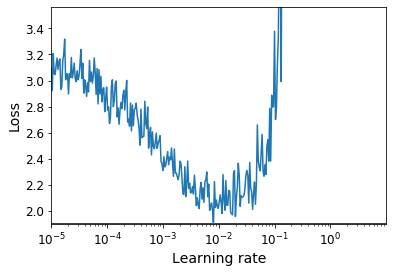

In [229]:
batch_size = 128
rates, losses = find_learning_rate(cifar_model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])

In [234]:
cifar_model = create_cifar_selu_100_model()
sgd_optimizer = keras.optimizers.SGD(lr=1e-2)
cifar_model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd_optimizer, metrics=["accuracy"])

In [235]:
batch_size=128
logdir = os.path.join(os.curdir, "my_logs", "cifar_logs", "lr_selu_onecycle_{:03f}".format(lr))
callbacks = prepare_callbacks(logdir, modelname="my_cifar10_selu_onecycle_model.h5")
n_epochs = 15
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = cifar_model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=callbacks + [onecycle])

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 4s 86us/sample - loss: 1.8888 - accuracy: 0.3261 - val_loss: 1.7421 - val_accuracy: 0.3658
Epoch 2/15
45000/45000 [==============================] - 3s 68us/sample - loss: 1.6867 - accuracy: 0.3972 - val_loss: 1.6908 - val_accuracy: 0.3864
Epoch 3/15
45000/45000 [==============================] - 3s 71us/sample - loss: 1.6014 - accuracy: 0.4276 - val_loss: 1.5945 - val_accuracy: 0.4274
Epoch 4/15
45000/45000 [==============================] - 3s 68us/sample - loss: 1.5416 - accuracy: 0.4545 - val_loss: 1.6101 - val_accuracy: 0.4226
Epoch 5/15
45000/45000 [==============================] - 3s 70us/sample - loss: 1.4980 - accuracy: 0.4678 - val_loss: 1.5071 - val_accuracy: 0.4620
Epoch 6/15
45000/45000 [==============================] - 3s 68us/sample - loss: 1.4549 - accuracy: 0.4843 - val_loss: 1.5936 - val_accuracy: 0.4438
Epoch 7/15
45000/45000 [==============================] -

In [236]:
cifar_model = keras.models.load_model("my_cifar10_selu_onecycle_model.h5")
cifar_model.evaluate(X_test_scaled , y_test)

10000/10000 [==============================] - 1s 103us/sample - loss: 1.4239 - accuracy: 0.5239


[1.4238969652175903, 0.5239]